In [1]:
%connect_info


{"key":"7e2cc3d3-f2ec-4b07-bbae-4db697bf0873","signature_scheme":"hmac-sha256","transport":"tcp","ip":"127.0.0.1","hb_port":9000,"control_port":9001,"shell_port":9002,"stdin_port":9003,"iopub_port":9004,"kernel_name":"python3112jvsc74a57bd04149aa2f31a7f8b5ff184e82bf464dce73529b69401cc2940ad6232b832b4da8"}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-v306a98e540d3d3bd1017b050e42a30974bdf5f1a8.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

import mne

In [3]:
%load_ext IPython.extensions.autoreload
%autoreload 2

import hypyp.fnirs
import hypyp.plots
import hypyp.wavelet


Loading pywt from /home/patrice/work/ppsp/pywt/pywt
Loading pycwt from /home/patrice/work/ppsp/pycwt/pycwt


ninja: error: '/tmp/pip-build-env-61gigug6/overlay/bin/cython', needed by 'pywt/_extensions/_cwt.cpython-311-x86_64-linux-gnu.so.p/_cwt.c', missing and no known rule to make it


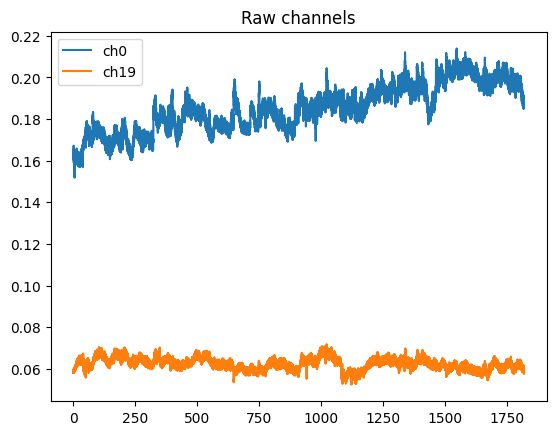

In [4]:
base_path = "/media/patrice/My Passport/DataNIRS/"
filename = "syn_ce05_001.nirs"

file_path = os.path.join(base_path, filename)

mat = scipy.io.loadmat(file_path)

mat.keys()

x = mat['t']
y1 = mat['d'][:,0]
y2 = mat['d'][:,19]
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(['ch0', 'ch19'])
plt.title('Raw channels')
plt.show()


Downscaling for display by a factor of 10


<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

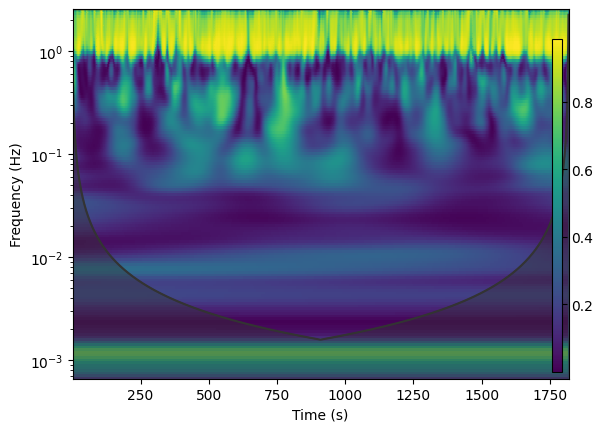

In [5]:
wa = hypyp.wavelet.WaveletAnalyser()

dt = x[1] - x[0]
res = wa.wct(y1, y2, dt)

res.plot(downsample=True)
